# 1. Use pandas to get some insights into the data 

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('House_Rental_Data.csv')

In [3]:
df

,Sqft,Floor,Total_Floor,Bedroom,Living_Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


# Print No. Of Rows And Columns.

In [4]:
print('Number of Rows : ',df.shape[0],'\nNumber of Columns : ',df.shape[1])

Number of Rows :  645 
Number of Columns :  7


# Info Of data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   Total_Floor  645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living_Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


# Describe The Data.

In [6]:
df.describe(include='all')

,Sqft,Floor,Total_Floor,Bedroom,Living_Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


# Which 'Sqft' Has Maximum 'Price'.

In [7]:
df.groupby('Sqft')['Price'].max().nlargest(1)

Sqft
3504.63    250000
Name: Price, dtype: int64

# Which 'Sqft' Has Minimum 'Price'.

In [8]:
df.groupby('Sqft')['Price'].min().nsmallest(1)

Sqft
996.24    6100
Name: Price, dtype: int64

# 'Total_Floor' with Maximum Frequency.

In [9]:
print('Total_Floor with maximum frequency : ',df['Total_Floor'].value_counts().idxmax())

Total_Floor with maximum frequency :  7


# 2. Show some interesting visualization of the data

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# For ignoring the Future Warnings

import warnings
warnings.filterwarnings('ignore')

# Perform Univariate analysis on 'Price' , 'Sqft' , 'Total_Floor' column by plotting    histogram using seaborn dist plot.

[Text(0.5, 1.0, 'Univariate analysis on Price\n')]

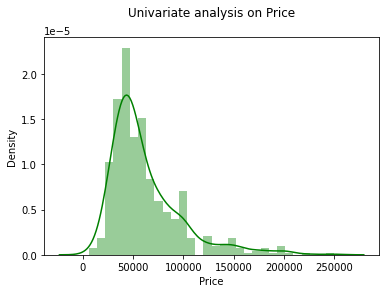

In [12]:
displot1 = sns.distplot(df['Price'],color='green')
displot1.set(title='Univariate analysis on Price\n')

[Text(0.5, 1.0, 'Univariate analysis on Sqft\n')]

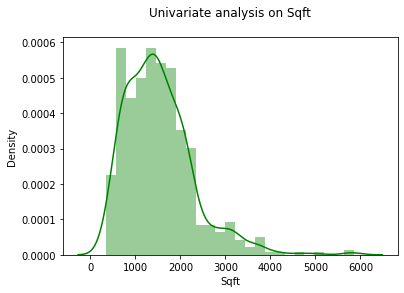

In [13]:
displot2 = sns.distplot(df['Sqft'],color='green')
displot2.set(title='Univariate analysis on Sqft\n')

[Text(0.5, 1.0, 'Univariate analysis on Total_Floor\n')]

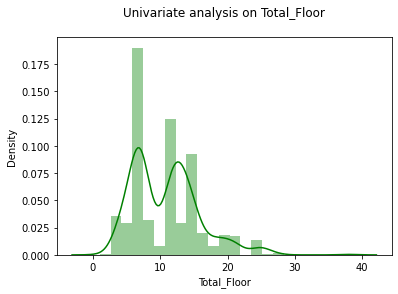

In [14]:
displot3 = sns.distplot(df['Total_Floor'],color='green')
displot3.set(title='Univariate analysis on Total_Floor\n')

# Plot a scatter plot of 'Price' & 'Sqft'.

[Text(0.5, 1.0, 'Scatter plot of Price & Sqft\n')]

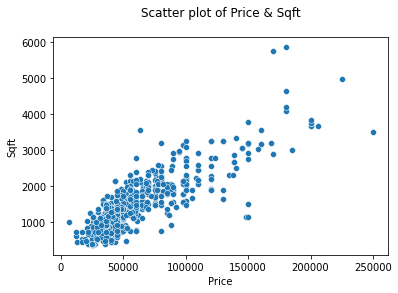

In [15]:
scatterplot1=sns.scatterplot(x=df['Price'],y=df['Sqft'])
scatterplot1.set(title='Scatter plot of Price & Sqft\n')

# Plot Pairplot on dataset.

Text(0.5, 1.05, 'Pairplot on grouped data\n')

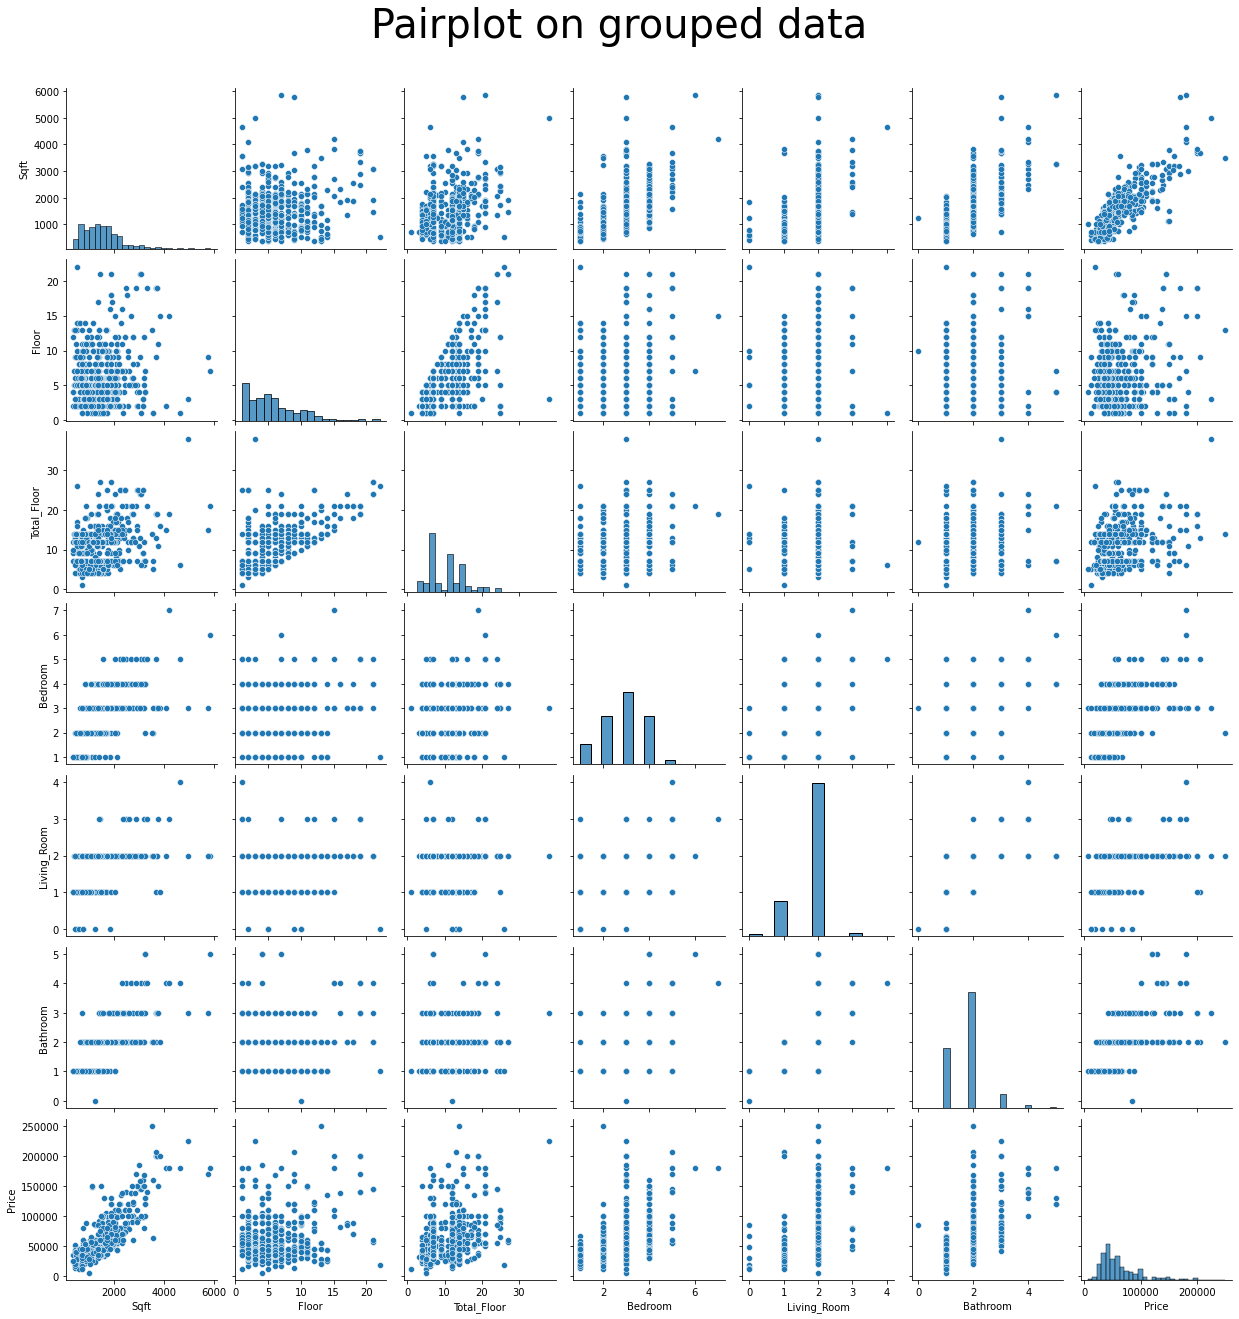

In [16]:
pairplot1=sns.pairplot(df)
pairplot1.fig.suptitle('Pairplot on grouped data\n',y=1.05,fontsize=40)

# Plot a bar plot of 'Price' column with 'Sqft'.

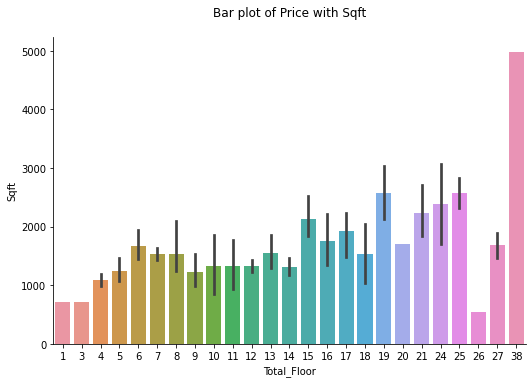

In [17]:
barplot1=sns.catplot(data=df,x='Total_Floor',y='Sqft',kind='bar',aspect=1.5)
barplot1.set(title='Bar plot of Price with Sqft\n')

# 3. Manage data for training & testing

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from math import sqrt

In [19]:
# Define x and y.

X = df[['Sqft','Floor','Total_Floor','Bedroom','Living_Room','Bathroom']]
y = df['Price']
print(X.shape, y.shape)

(645, 6) (645,)


In [20]:
# Split into training dataset and test dataset. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=10) 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(516, 6) (129, 6) (516,) (129,)


In [21]:
# fit the model

model = RandomForestRegressor(random_state=10)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [22]:
# Make predictions

model.predict(X_test)

array([ 35064.32      ,  77839.75550397, 180060.        , 130149.98      ,
        41737.345     ,  68181.60666667,  40623.686     ,  35773.        ,
        55463.51412698, 104458.66      ,  47812.41142857,  42102.545     ,
        34967.95      ,  73539.84291667,  74161.63666667,  40901.2       ,
        52710.24333333,  57118.30333333,  23478.56      ,  55925.        ,
        74852.98      ,  49942.        ,  31923.11      , 100280.47619048,
        26389.76      ,  38969.89      ,  54679.99      ,  55279.99      ,
        83888.71      ,  68790.        ,  40901.2       ,  59728.24333333,
        25435.9       , 100274.35      ,  44481.49916667,  61037.96      ,
        69819.99      ,  32054.        ,  25570.28      ,  28418.15      ,
       124364.4       ,  52490.        ,  28964.99      ,  70722.00333333,
        53640.        , 130741.63666667,  57286.15079365, 105733.11      ,
        87307.53      ,  39231.        ,  37983.        ,  32304.06      ,
        49554.3275    ,  

In [23]:
y_test

408     32000
442     78000
299    206000
27     145000
592     31000
        ...  
501    158000
463    100000
110     52000
218     28000
433     43000
Name: Price, Length: 129, dtype: int64

In [24]:
#Accuracy of The Model

model.score(X_test, y_test)

0.8400165010908814

# 4. Finding a better value of k

In [25]:
rmse_val = []  # To store RSME Value Of Different K.
for k in range(20): # Looping through values of K.
    k = k+1
    model = neighbors.KNeighborsRegressor(n_neighbors = k) # Running KNeighborsRegressor with k neighbours.
    
    model.fit(X_train, y_train) # fit the Model.
    clf=model.predict(X_test) # Make Prediction On Test Set.
    error = sqrt(mean_squared_error(y_test, clf))  # Obtaining RSME for KNeighborsRegressor with k neighbours.
    rmse_val.append(error)  # Adding RMSE for k neighbours to rmse_val
    print('RMSE value for k=',k,'is:',error)

RMSE value for k= 1 is: 22064.9890028904
RMSE value for k= 2 is: 17635.057936300258
RMSE value for k= 3 is: 16642.299571060485
RMSE value for k= 4 is: 17894.66092472695
RMSE value for k= 5 is: 18312.751809184938
RMSE value for k= 6 is: 17099.955067411538
RMSE value for k= 7 is: 17136.93347712844
RMSE value for k= 8 is: 17297.67835429493
RMSE value for k= 9 is: 17432.084236584316
RMSE value for k= 10 is: 17714.594840971313
RMSE value for k= 11 is: 17780.308800896135
RMSE value for k= 12 is: 17569.57907758315
RMSE value for k= 13 is: 17424.22718949114
RMSE value for k= 14 is: 17674.485878488722
RMSE value for k= 15 is: 17655.81090112729
RMSE value for k= 16 is: 17888.937672977623
RMSE value for k= 17 is: 17807.396309295207
RMSE value for k= 18 is: 17675.194630137743
RMSE value for k= 19 is: 17819.983249017823
RMSE value for k= 20 is: 17877.275995630695


<AxesSubplot:>

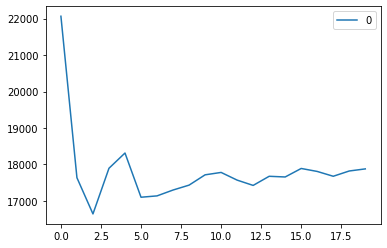

In [26]:
# Plotting the RMSE Values against K Values.
curve = pd.DataFrame(rmse_val)
curve.plot()

In [27]:
# Searching for an optimal value of K for KNN

# list of scores from k_range
k_range = range(20) 

# List to store scores
k_scores = []

# Looping through values of k
for k in k_range:
    # Running KNeighborsClassifier wih k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # Obtaining cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=15, scoring='accuracy')
    # Appending mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[nan, 0.248062015503876, 0.1736434108527132, 0.15968992248062014, 0.15038759689922482, 0.14573643410852713, 0.1441860465116279, 0.1441860465116279, 0.15348837209302324, 0.14263565891472868, 0.14728682170542634, 0.1426356589147287, 0.13953488372093023, 0.13798449612403102, 0.1317829457364341, 0.1317829457364341, 0.12248062015503874, 0.12093023255813952, 0.11627906976744186, 0.11627906976744187]


Text(0, 0.5, 'Cross-Validated Accuracy')

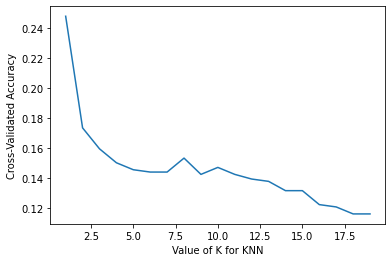

In [28]:
# Ploting the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [29]:
# Printing mean scores
print(scores.mean())

0.11627906976744187
